Meraj Patel

In [1]:
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True) 
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset
dataset = pd.read_csv("master.csv")

# Rename columns
dataset.rename(columns={"suicides/100k pop": "suicides/100k_pop", "HDI for year":"HDI_for_year", " gdp_for_year ($) ":"gdp_for_year", 
                   "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)

dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Data Overview

In [2]:
dataset.shape

(27820, 12)

In [3]:
dataset.isna().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k_pop        0
country-year             0
HDI_for_year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

__Drop Columns:__
* HDI_for_year
* year
* country-year
* suicides_no
* gdp_for_year

In [4]:
drop_cols = ['HDI_for_year', 'country-year', 'suicides_no', 'gdp_for_year', 'year']
dataset.drop(columns=drop_cols, inplace=True)

In [5]:
dataset.dtypes

country               object
sex                   object
age                   object
population             int64
suicides/100k_pop    float64
gdp_per_capita         int64
generation            object
dtype: object

## Apply onehot encoding and predict the target variable for the people with age 20, male, and generation X

Below subsets dataset and creates a test set, _df_test_ consisting of males, age 20 of generation X. The test set consists of 30% of said individuals in the dataset. Also, create train dataset, _df_ by dropping test set records from the dataset.

In [6]:
df_20_m_x = dataset[ (dataset['sex'] == "male") & (dataset['age'] == "15-24 years") & (dataset['generation'] == 'Generation X')].copy()

# Test dataset - df_test
df_test = df_20_m_x.sample(n=int(df_20_m_x.shape[0]*0.3), random_state=40)

# Train dataset - df
df = dataset.drop(df_test.index, axis=0).copy()

# Reset index
df.reset_index(inplace=True)
df_test.reset_index(inplace=True)

### Preprocessing

Split features among numerical and categorical as shown below

In [7]:
cat_cols = ['sex', 'age', 'country', 'generation']
num_cols = ['population', 'gdp_per_capita']

Preprocess data via pipeline: 
1. Apply MinMax scaler to numerical features
2. Apply One Hot Encoding to categorical features

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, num_cols),
        ('cat',categorical_transformer, cat_cols )
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Train
X_train = df.drop(columns=['suicides/100k_pop'])
y_train = df['suicides/100k_pop']

# Test
X_test = df_test.drop(columns=['suicides/100k_pop'])
y_test = df_test['suicides/100k_pop']

# Fit and transform via train
X_train = pipeline.fit_transform(X_train)

# Transform test 
X_test = pipeline.transform(X_test)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Text(0, 0.5, 'Absolute Error')

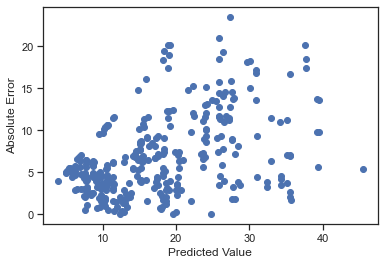

In [10]:
plt.scatter(y_pred, abs(y_pred - y_test))
plt.xlabel('Predicted Value')
plt.ylabel("Absolute Error")

In [11]:
model.score(X_test, y_test)

0.41909796664361854

### What is the MAE error of this prediction?

In [12]:
mean_absolute_error(y_test, y_pred)

6.858413949958673

### How many regression coefficients are there?

Model yields 117 regression coefficients - provided our preprocessing pipeline created 117 features. 

In [13]:
model.coef_

array([  5.39604822, -13.51169454,  -7.46601233,   7.46601234,
        -2.95574077,  -0.34346069,   1.89335699, -11.69959517,
         2.94639427,  10.15904537,  -9.89442074, -11.89546459,
        -2.55838206, -10.04777408,  -1.27530026,   2.61618878,
        13.7194736 , -11.61908401,  -9.47116805,  -9.68082596,
        -9.36417339,  17.8885351 ,  11.03877234,  -6.83283206,
        -8.12731658,  -8.67082166,   6.37478233,  -1.66029269,
         1.73256562,  -2.36670052,  -8.16411178,  -6.01947214,
        10.45674314,   8.29371279,  -7.2196081 ,   6.28053029,
         5.908263  , -14.15733833,  -7.08644668,  -2.78813278,
        15.0799211 ,  -7.74985145,  12.76718207,  11.01382106,
        -9.03470155,   5.09507776,  -7.75296693, -10.80292812,
       -10.23966172,   8.79647011,  20.31780093,   3.20720733,
         0.69750544,  -2.23689732,  -2.81248163, -12.83098527,
        10.90724357,  17.40948546,  -6.99133548,  -9.32076072,
         0.82622638,  16.79184139,  27.87861285,  10.31

In [14]:
len(model.coef_)

117

## Convert nominal to numerical and predict the target value for the people with age 20, male, and generation X

Below subsets dataset and creates a test set _df_test_ consisting of males, age 20 of generation X. The test set consists of 30% of said individuals in the dataset. Also, create train dataset _df_ by dropping test set records from the dataset.

In [15]:
df_20_m_x = dataset[ (dataset['sex'] == "male") & (dataset['age'] == "15-24 years") & (dataset['generation'] == 'Generation X')].copy()

# Test dataset - df_test
df_test = df_20_m_x.sample(n=int(df_20_m_x.shape[0]*0.3), random_state=40)

# Train dataset - df
df = dataset.drop(df_test.index, axis=0).copy()

# Reset index
df.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

### Preprocessing

__Replace country with numeric__

Replace country with numeric depicting rank in terms of mean suicides/100k_pop discovered in train dataset. I.e., provided 101 countries, 'Saint Kitts and Nevis' assigned rank 0 (lowest mean in suicides/100k_pop) and 'Lithuania' assigned rank 100 (highest mean in suicides/100k_pop)

In [16]:
c_rank = df.groupby('country')['suicides/100k_pop'].mean().sort_values()
c_rank.values[:] = np.arange(c_rank.shape[0])
c_rank_dic = c_rank.astype(int).to_dict()

In [17]:
df.replace({"country": c_rank_dic}, inplace=True)
df_test.replace({"country": c_rank_dic}, inplace=True)

__Replace generation with numeric__

Replace generation with numeric depicitng order of generations

In [18]:
gen_rank = {'Generation Z':1, 'Millenials':2, 'Generation X':3, 'Boomers':4,'Silent':5, 'G.I. Generation':6}
df.replace({'generation':gen_rank}, inplace=True)
df_test.replace({'generation':gen_rank}, inplace=True)

__Create numeric variable rank__

The plot below depicts a higher mean rate of suicides/100k_pop for males than females. Additionally, older age groups are associated with higher rates of suicides. 

<AxesSubplot:xlabel='age', ylabel='suicides/100k_pop'>

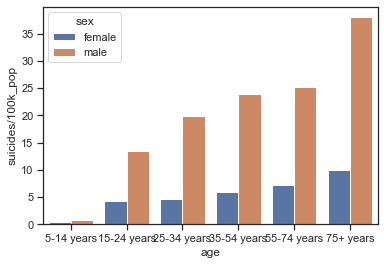

In [19]:
age_df = df.groupby(['age','sex'])["suicides/100k_pop"].mean().to_frame()
age_df = age_df.reset_index()
sns.barplot(x="age",y="suicides/100k_pop",hue="sex",data=age_df.sort_values("suicides/100k_pop"))

We can combine 'age' and 'sex' features to create a new feature, 'rank,' depicting the likeliness of suicide. Specifically, grouping by age and sex and calculating the mean of suicides/100k_pop yields the following order.

In [20]:
age_sex_rank = df.groupby(['age', 'sex'])['suicides/100k_pop'].mean().sort_values()
age_sex_rank

age          sex   
5-14 years   female     0.462252
             male       0.777831
15-24 years  female     4.328018
25-34 years  female     4.573210
35-54 years  female     5.916480
55-74 years  female     7.123447
75+ years    female     9.919802
15-24 years  male      13.413683
25-34 years  male      19.800560
35-54 years  male      23.978402
55-74 years  male      25.187712
75+ years    male      37.991017
Name: suicides/100k_pop, dtype: float64

We shall categorize order among three ranks [0,1,2] and designate a rank per row based on the ordering above. I.e., females/males of age 5-14 years are assigned a rank of 0.

In [21]:
age_sex_rank.values[:] = np.array([0,0,0,0,1,1,1,1,2,2,2,2])
age_sex_rank_dict = age_sex_rank.astype(int).to_dict()
df['rank'] = pd.Series( list(zip(df['age'], df['sex'])) ).map(age_sex_rank_dict)
df_test['rank'] = pd.Series( list(zip(df_test['age'], df_test['sex'])) ).map(age_sex_rank_dict)

Below reflects the newly created rank feature correspondence to suicides/100k_pop. 

<AxesSubplot:xlabel='rank', ylabel='suicides/100k_pop'>

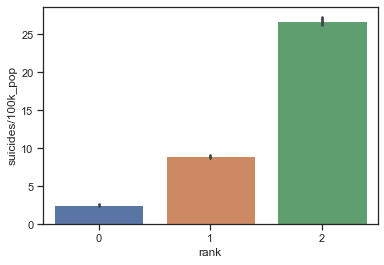

In [22]:
sns.barplot(x='rank', y='suicides/100k_pop', data=df)

__Replace age with numeric__ 

Replace age with numeric depicting rank in terms of mean suicides/100k_pop discovered in train dataset. I.e., provided 6 age groups, '5-14 years' assigned rank 0 (lowest mean in suicides/100k_pop) and '75+ years' assigned rank 5 (highest mean in suicides/100k_pop)

In [23]:
age_rank = df.groupby('age')['suicides/100k_pop'].mean().sort_values()
age_rank.values[:] = np.arange(age_rank.shape[0]).astype(np.int32)
age_rank_dict = age_rank.astype(int).to_dict()
age_rank_dict

{'5-14 years': 0,
 '15-24 years': 1,
 '25-34 years': 2,
 '35-54 years': 3,
 '55-74 years': 4,
 '75+ years': 5}

In [24]:
df.replace({"age": age_rank_dict}, inplace=True)
df_test.replace({"age": age_rank_dict}, inplace=True)

__Replace sex with numeric__

Repalce sex with binary values - 0 for male, 1 for female

In [25]:
df['sex'].replace({'male':0, 'female':1}, inplace=True)
df_test['sex'].replace({'male':0, 'female':1}, inplace=True)

__Correlation Matrix__

Features _rank_, _country_, _age_, and _generation_ are highly correlated with suicides/100k_pop. Thus, we should expect significant coefficients for said features after applying linear regression. 

In [26]:
df.corr()

,country,sex,age,population,suicides/100k_pop,gdp_per_capita,generation,rank
country,1.000000,0.000367,0.000584,0.078918,0.447737,0.156390,-0.006302,0.000218
sex,0.000367,1.000000,-0.010254,0.012391,-0.393494,-0.003812,-0.005035,-0.616835
age,0.000584,-0.010254,1.000000,-0.060401,0.365856,-0.002562,0.911320,0.659629
population,0.078918,0.012391,-0.060401,1.000000,0.008099,0.081098,-0.059073,-0.006025
suicides/100k_pop,0.447737,-0.393494,0.365856,0.008099,1.000000,0.001429,0.337070,0.521999
gdp_per_capita,0.156390,-0.003812,-0.002562,0.081098,0.001429,1.000000,-0.118517,0.000653
generation,-0.006302,-0.005035,0.911320,-0.059073,0.337070,-0.118517,1.000000,0.591783
rank,0.000218,-0.616835,0.659629,-0.006025,0.521999,0.000653,0.591783,1.000000


In [27]:
X_train = df.drop(columns=['suicides/100k_pop'])
y_train = df['suicides/100k_pop']

X_test = df_test.drop(columns=['suicides/100k_pop'])
y_test = df_test['suicides/100k_pop']

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Text(0, 0.5, 'Absolute Error')

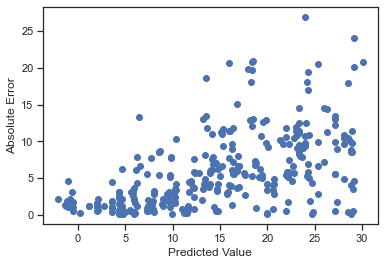

In [29]:
plt.scatter(y_pred, abs(y_pred - y_test))
plt.xlabel('Predicted Value')
plt.ylabel("Absolute Error")

In [30]:
model.score(X_test, y_test)

0.5035017129340874

### What is the MAE error of this prediction?

In [31]:
mean_absolute_error(y_test, y_pred)

5.813362428196509

### How many regression coefficients are there?

The model yields 7 regression coefficients - provided our preprocessing steps incorporated seven features into our linear regression model. 

In [32]:
len(model.coef_)

7

## Note any change in these two model performances

Yes, converting nominal features into numerical form yields a lower MAE and higher accuracy score upon test set validation. As shown in question one, one-hot encoding nominal features produces a substantial number of coefficients in our linear regression model. Moreover, the computed coefficients are disproportionate and thus introduce noise which negatively affects predictions. While in question two, converting nominal into numerical reduces the number of coefficients. Moreover, applying numerical ranking (instead of one-hot encoding) yields higher correlation to our target variable suicides/100k_pop. E.g., ranking age in terms of mean suicides/100k_pop instead of one-hot encoding. 

## Prediction for age 33, male and generation Alpha (i.e. the generation after generation Z)

In [33]:
age = 2 # 25-34 years: 2
print("Age Group: " + list(age_rank_dict.keys())[list(age_rank_dict.values()).index(age)])
sex = 0 # male: 0
print("Sex: Male" )
generation = 0 # Alpha: 0
print("Generation: Alpha")
country = np.random.randint(0, 101)
print ('Country Name: ' + list(c_rank_dic.keys())[list(c_rank_dic.values()).index(country)] 
      + '\nCountry Rank: ' + str(country) )
population = round(df[df['country'] == country]['population'].mean(), 2)
print("Population: " + str(population) )
gdp_per_capita = round(df[df['country'] == country]['gdp_per_capita'].mean(), 2)
print("Gdp per capita: " + str(gdp_per_capita) )
rank = age_sex_rank_dict[('35-54 years', 'male')]
print("Rank: " + str(rank))

# Predict
X = np.array([country, sex, age, population, gdp_per_capita, generation, rank])
X_test = scaler.transform(X.reshape(1,-1))
y_pred = model.predict(X_test)
print("\nPredicted suicides/100k_pop: " + str(round(y_pred[0],2)) )

Age Group: 25-34 years
Sex: Male
Generation: Alpha
Country Name: Albania
Country Rank: 20
Population: 234946.38
Gdp per capita: 1885.29
Rank: 2

Predicted suicides/100k_pop: 11.55
